In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml("mnist_784", version=1)

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
x, y = mnist["data"].values, mnist["target"].values
y = y.astype(np.float)

<ipython-input-4-c435a563896b>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.float)


In [5]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

1.0


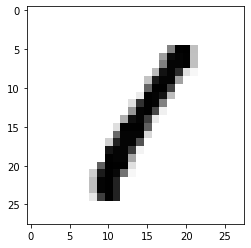

In [12]:
n=3

plt.imshow(x[n].reshape(28, 28), cmap="binary")
print(y[n])
plt.show()

### Classificador binário

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [15]:
y_train_5 = (y_train == 5)

In [18]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(x_train, y_train_5)

SGDClassifier()

Classe real:  False
Classe predita pelo modelo:  [False]


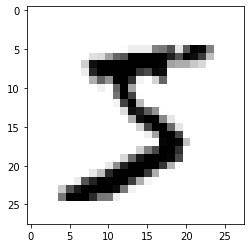

In [26]:
n = 2
plt.imshow(x[0].reshape(28, 28), cmap="binary")

print("Classe real: ", y_train_5[n])
print("Classe predita pelo modelo: ", sgd_clf.predict([x_train[n]]))

### Como estimar a acuácia de um modelo

In [29]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring="accuracy")

array([0.96167503, 0.91759015, 0.96161146])

### A matriz de confusão

In [30]:
from sklearn.metrics import confusion_matrix

In [39]:
confusion_matrix(y_train_5, sgd_clf.predict(x_train))

array([[44468,   141],
       [ 1822,  2569]])

In [40]:
from sklearn.metrics import precision_score, recall_score

y_train_pred = sgd_clf.predict(x_train)

print("Precision: ", precision_score(y_train_5, y_train_pred))
print("Recall: ", recall_score(y_train_5, y_train_pred))

Precision:  0.9479704797047971
Recall:  0.5850603507173765


In [42]:
from sklearn.metrics import classification_report

print(confusion_matrix(y_train_5, sgd_clf.predict(x_train)))
print(classification_report(y_train_5, y_train_pred))

[[44468   141]
 [ 1822  2569]]
              precision    recall  f1-score   support

       False       0.96      1.00      0.98     44609
        True       0.95      0.59      0.72      4391

    accuracy                           0.96     49000
   macro avg       0.95      0.79      0.85     49000
weighted avg       0.96      0.96      0.96     49000



### Classificação multiclasse

In [43]:
sgd_clf.fit(x_train, y_train)

SGDClassifier()

In [44]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train, cv=3)

In [45]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_train, y_train_pred)
print(conf_mx)
print(classification_report(y_train, y_train_pred))

[[4491    1   63   19   12   22   66   11  130    7]
 [   0 5257   31   13    6   15   13    7  136    6]
 [  24   65 4185   91   43   14  113   55  240   11]
 [  19   23  158 4251   13  139   27   46  252   53]
 [   6   18   37   15 4304   17   96   35  138  112]
 [  47   28   36  201   82 3349  142   20  430   56]
 [  24   14   40    2   21   63 4710    1   56    0]
 [  14   32   84  101   68   18   11 4275  173  312]
 [  25  104   51   86   38  147   44   22 4231   40]
 [  12   32   16  101  274   40    8  249  301 3863]]
              precision    recall  f1-score   support

         0.0       0.96      0.93      0.95      4822
         1.0       0.94      0.96      0.95      5484
         2.0       0.89      0.86      0.88      4841
         3.0       0.87      0.85      0.86      4981
         4.0       0.89      0.90      0.89      4778
         5.0       0.88      0.76      0.82      4391
         6.0       0.90      0.96      0.93      4931
         7.0       0.91      0.84   

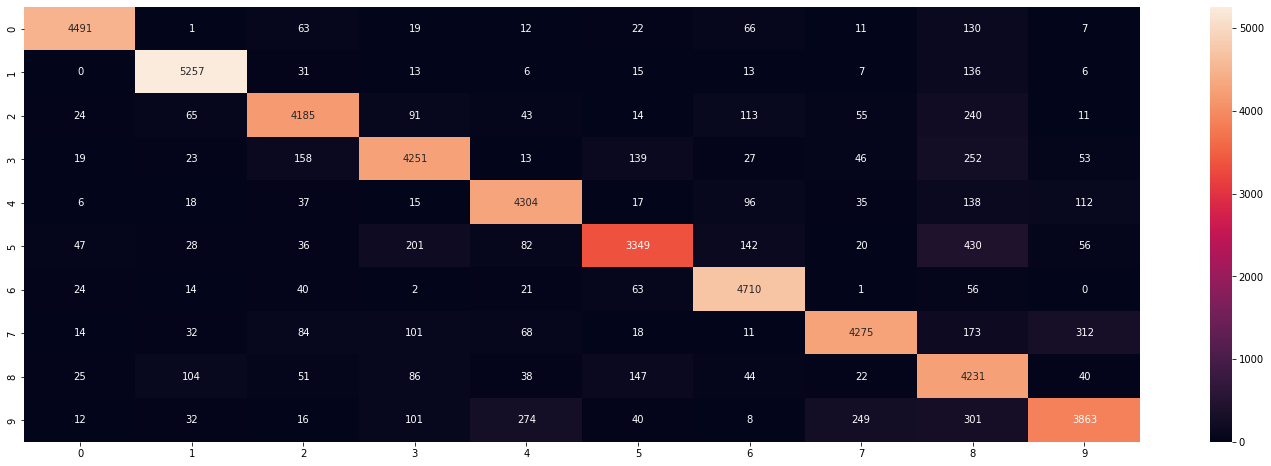

In [46]:
fig, ax = plt.subplots(figsize=(25, 8))
sns.heatmap(conf_mx, annot=True, fmt=".0f")

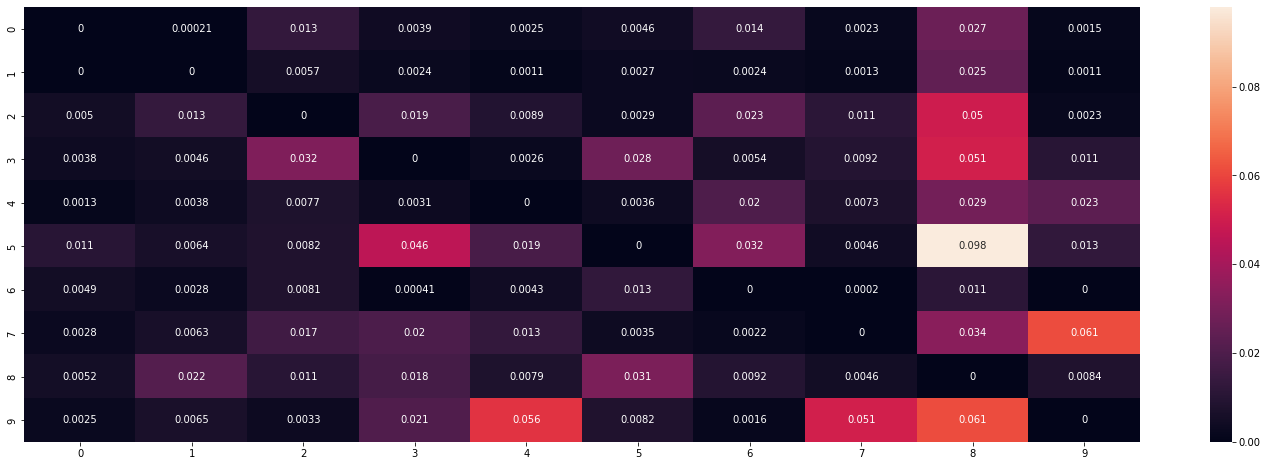

In [47]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx /row_sums

np.fill_diagonal(norm_conf_mx, 0)

fig, ax = plt.subplots(figsize=(25, 8))
sns.heatmap(norm_conf_mx, annot=True)

### Classificação Multilabel

In [54]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

In [55]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_multilabel)

KNeighborsClassifier()

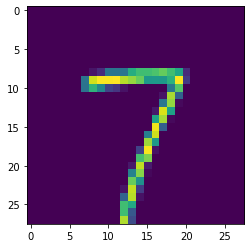

In [58]:
n = 42

digit = x_train[n]
plt.imshow(digit.reshape(28,28))

In [59]:
knn_clf.predict([digit])

array([[ True,  True]])